## STEP-2 (Reducing the number of parameters)
    Target:

        -- Our previous model has 776K parameters. I want to reduce these parameters here. I want to make them < 8K

    Results:

        -- Parameters: 7,330
        -- Best Training Accuracy: 99.48
        -- Best Test Accuracy: 99.24

    Analysis:

        -- The accuracy has dropped from 99.60 to 99.24 after reducing the number of parameters
        -- training and test accuracy are increasing with epochs. So we are in the right path. We might improve results by training it for few more epochs. We will keep number of epochs to 15 and increase it if required in future


# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd 'drive/MyDrive/ERA_V1/Session_7_InDepth_Coding_Practice'

/content/drive/MyDrive/ERA_V1/Session_7_InDepth_Coding_Practice


In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Data Transformations



In [4]:
from data_transformers import Transforms
transforms_obj = Transforms()
train = transforms_obj.download_train_data()
test = transforms_obj.download_test_data()

# Train Test Dataloaders




In [5]:
from train_test_loaders import Train_Test_Dataloaders
train_test_dataloaders_obj = Train_Test_Dataloaders()

train_loader = train_test_dataloaders_obj.get_train_dataloader(train)
test_loader = train_test_dataloaders_obj.get_test_dataloader(test)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# The Model

$$n_{out} = \lfloor \frac{n_{in} + 2p - k}{s} \rfloor + 1$$

$$j_{out} = j{_in}*s$$

$$r_{out} = r_{in} + (k-1)*j_{in}$$


**n_in:** number of input features

**n_out:** number of output features

**k:** kernel_size

**s:** stride

**p:** padding

**j_in:** jump in

**j_out:** jump out

**r_in:** in receptive field

**r_out:** out receptive field

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda


In [7]:
from models import Model2
model = Model2().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
            Conv2d-4           [-1, 10, 24, 24]             900
              ReLU-5           [-1, 10, 24, 24]               0
       BatchNorm2d-6           [-1, 10, 24, 24]              20
            Conv2d-7           [-1, 12, 22, 22]           1,080
              ReLU-8           [-1, 12, 22, 22]               0
       BatchNorm2d-9           [-1, 12, 22, 22]              24
           Conv2d-10           [-1, 14, 20, 20]           1,512
             ReLU-11           [-1, 14, 20, 20]               0
      BatchNorm2d-12           [-1, 14, 20, 20]              28
        MaxPool2d-13           [-1, 14, 10, 10]               0
           Conv2d-14             [-1, 1

# Let's Train and test our model

In [8]:
from train_test import Train_Test
train_test_obj = Train_Test()

train_losses, test_losses, train_acc, test_acc = train_test_obj.train_and_test_model(model, device, 15, train_loader, test_loader)

EPOCH: 0


loss=0.0717351883649826 Batch_id=468 Accuracy=91.09: 100%|██████████| 469/469 [00:18<00:00, 25.64it/s]



 Test set: Average loss: 0.0862, Accuracy: 9781/10000 (97.81%)

EPOCH: 1


loss=0.04908783733844757 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:20<00:00, 22.61it/s]



 Test set: Average loss: 0.0522, Accuracy: 9853/10000 (98.53%)

EPOCH: 2


loss=0.07659216225147247 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:18<00:00, 25.59it/s]



 Test set: Average loss: 0.0359, Accuracy: 9903/10000 (99.03%)

EPOCH: 3


loss=0.029049448668956757 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:18<00:00, 25.71it/s]



 Test set: Average loss: 0.0369, Accuracy: 9893/10000 (98.93%)

EPOCH: 4


loss=0.07053966820240021 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:18<00:00, 24.92it/s]



 Test set: Average loss: 0.0331, Accuracy: 9907/10000 (99.07%)

EPOCH: 5


loss=0.06099306419491768 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:18<00:00, 25.74it/s]



 Test set: Average loss: 0.0353, Accuracy: 9901/10000 (99.01%)

EPOCH: 6


loss=0.03423510119318962 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:19<00:00, 23.84it/s]



 Test set: Average loss: 0.0274, Accuracy: 9921/10000 (99.21%)

EPOCH: 7


loss=0.008518942631781101 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:18<00:00, 25.92it/s]



 Test set: Average loss: 0.0258, Accuracy: 9924/10000 (99.24%)

EPOCH: 8


loss=0.013512038625776768 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:20<00:00, 23.45it/s]



 Test set: Average loss: 0.0306, Accuracy: 9904/10000 (99.04%)

EPOCH: 9


loss=0.02778100222349167 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:18<00:00, 26.02it/s]



 Test set: Average loss: 0.0259, Accuracy: 9918/10000 (99.18%)

EPOCH: 10


loss=0.05343100056052208 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:18<00:00, 25.48it/s]



 Test set: Average loss: 0.0263, Accuracy: 9913/10000 (99.13%)

EPOCH: 11


loss=0.004509331192821264 Batch_id=468 Accuracy=99.37: 100%|██████████| 469/469 [00:18<00:00, 25.86it/s]



 Test set: Average loss: 0.0230, Accuracy: 9924/10000 (99.24%)

EPOCH: 12


loss=0.02300804853439331 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [00:18<00:00, 24.86it/s]



 Test set: Average loss: 0.0243, Accuracy: 9924/10000 (99.24%)

EPOCH: 13


loss=0.10644111037254333 Batch_id=468 Accuracy=99.46: 100%|██████████| 469/469 [00:18<00:00, 25.92it/s]



 Test set: Average loss: 0.0266, Accuracy: 9918/10000 (99.18%)

EPOCH: 14


loss=0.004844734910875559 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:18<00:00, 25.44it/s]



 Test set: Average loss: 0.0279, Accuracy: 9918/10000 (99.18%)



# Accuracy and Loss Visualisation

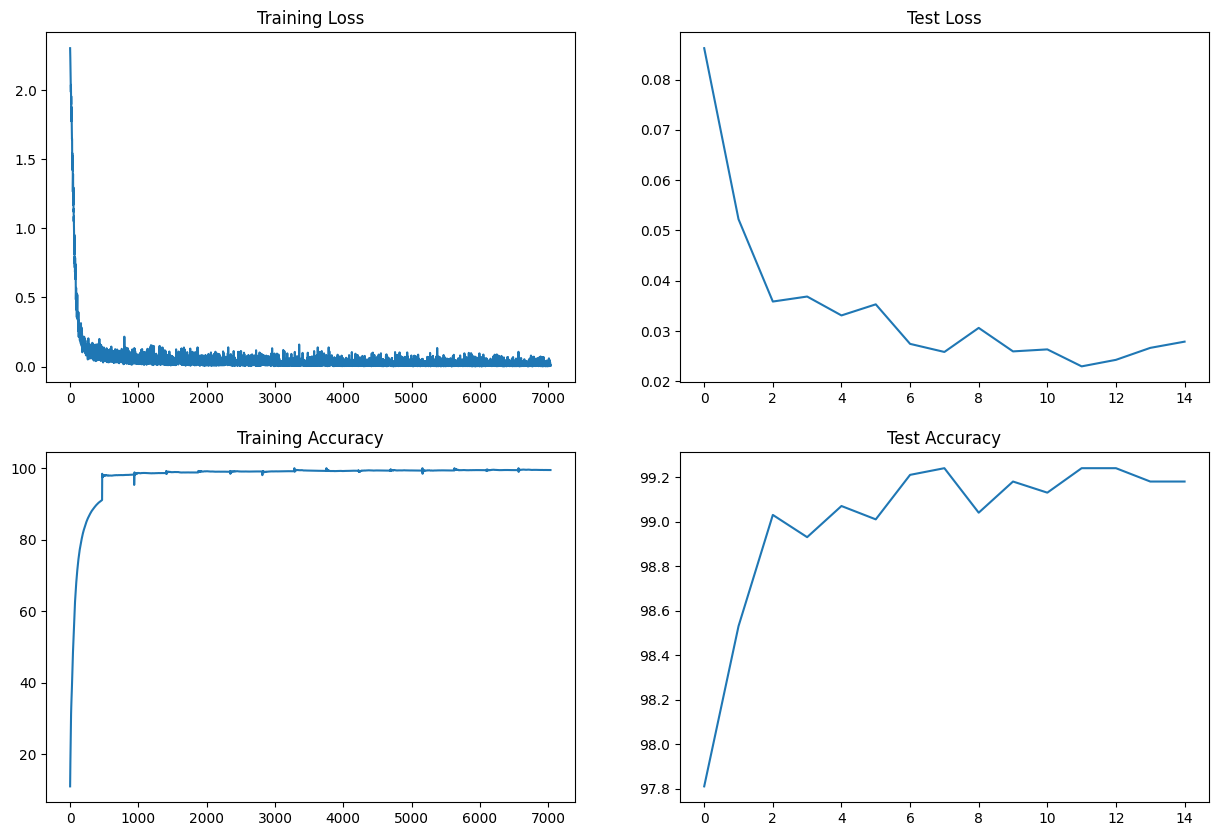

In [9]:
%matplotlib inline
from result_visualisation import Result_Visualisation
result_visualisation_obj = Result_Visualisation()
result_visualisation_obj.plot_accuracy_and_loss(train_losses, test_losses, train_acc, test_acc)